Name: Anmol Gupta  
Emp Id: 12072  
Track: Machine Learning (ML)
Roll no: 1805375

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Importing The Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Importing The Dataset

In [3]:
data_train=pd.read_csv('/content/drive/My Drive/train.csv')
data_center_info=pd.read_csv('/content/drive/My Drive/fulfilment_center_info.csv')
data_meal_info=pd.read_csv('/content/drive/My Drive/meal_info.csv')
data_test=pd.read_csv('/content/drive/My Drive/test_QoiMO9B.csv')

#Exploring The Dataset

In [4]:
data_train.shape  #This shows the number of rows and columns present in the dataset.

(456548, 9)

In [5]:
data_center_info.shape

(77, 5)

In [6]:
data_meal_info.shape

(51, 3)

In [7]:
data_test.shape

(32573, 8)

In [8]:
data_train.head() #This shows the first 5 rows present in the dataset.

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
data_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
data_meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [11]:
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


#Merging The Dataset

Here we are mergining the train dataset with meal dataset by using the column 'meal_id' which is present in both the datasets.

In [12]:
data_train=pd.merge(data_train,data_meal_info,on="meal_id") 

Here we are mergining the train dataset with center_info dataset by using the column 'center_id' which is present in both the datasets.

In [13]:
data_train=pd.merge(data_train,data_center_info,on="center_id")  

In [14]:
data_train.shape

(456548, 15)

In [15]:
data_test=pd.merge(data_test,data_meal_info,on="meal_id") #Here we are merging test dataset with meal dataset using 'meal_id'.

In [16]:
data_test=pd.merge(data_test,data_center_info,on="center_id") #Here we are merging test dataset with center_info dataset using 'center_id'.

In [17]:
data_test.shape

(32573, 14)

In [18]:
data_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [19]:
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


#Data Pre-Processing

In [20]:
data_train.isnull().sum() #This displays total number of null values present in the dataset.

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

No null value was found

In [21]:
data_train.nunique() #This displays total number of unique values present in the dataset.

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

There is no column with only 1 value so there is no constant column but there are some columns with only 2 values so we will check them if they are quasi constant columns or not

In [22]:
data_train['emailer_for_promotion'].value_counts() #Taking count of each value present in column to check if it is quasi constant or not

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [23]:
data_train['homepage_featured'].value_counts() #Taking count of each value present in column to check if it is quasi constant or not

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [24]:
data_train['num_orders'].describe() #This gives statistical view of data.

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [25]:
data_train.dtypes #This displays datatype of each column in dataset.

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [26]:
data_train.columns #This displays all columns in dataset.

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

Function to check duplicate columns:

In [27]:
def check_duplicate_column(data_train):
    dupli=set()
    for i in range(data_train.shape[1]):
        c1=data_train.iloc[:,i]
        for j in range(i+1,data_train.shape[1]):
            c2=data_train.iloc[:,j]
            if c1.equals(c2):
                dupli.add(data_train.columns.value)
                
    return list(dupli)

In [28]:
#Calling the function to check duplicate columns present or not.
duplicate=check_duplicate_column(data_train)
print(duplicate)

[]


Since we got an empty list therefore there is no duplicate column in dataset

In [29]:
data_train.duplicated().sum() #This is used to check duplicate rows.

0

In [30]:
data_train.shape

(456548, 15)

In [31]:
#Removing quasi constant columns if present
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(data_train[['emailer_for_promotion','homepage_featured']])  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [32]:
df=data_train[['emailer_for_promotion','homepage_featured']]
# get_support is a boolean vector that indicates which features are retained.
len(df.columns[sel.get_support()]) #we get the number of features that are not quasi-constant

2

As we passed 2 features as input and got 2 features as output therefore there is no quasi constant feature present.

#Splitting The Dataset

Splitting the data_train into X_train and X_test_intial

In [33]:
X_train,X_test_initial,y_train,y_test_initial=train_test_split(data_train.drop(labels=['num_orders'],axis=1),data_train['num_orders'],test_size=0.3,random_state=7)

In [34]:
X_train.shape,X_test_initial.shape

((319583, 14), (136965, 14))

Splitting X_test_initial into X_val and X_test

In [35]:
X_val,X_test,y_val,y_test=train_test_split(X_test_initial,y_test_initial,test_size=0.5,random_state=7)

In [36]:
X_val.shape,X_test.shape

((68482, 14), (68483, 14))

#Data Visualization

We have created a temporary column in X_train that reflects target variable num_orders in y_train.This will help in analysis and feature engineering later.

In [37]:
X_train['num_of_orders']=y_train 

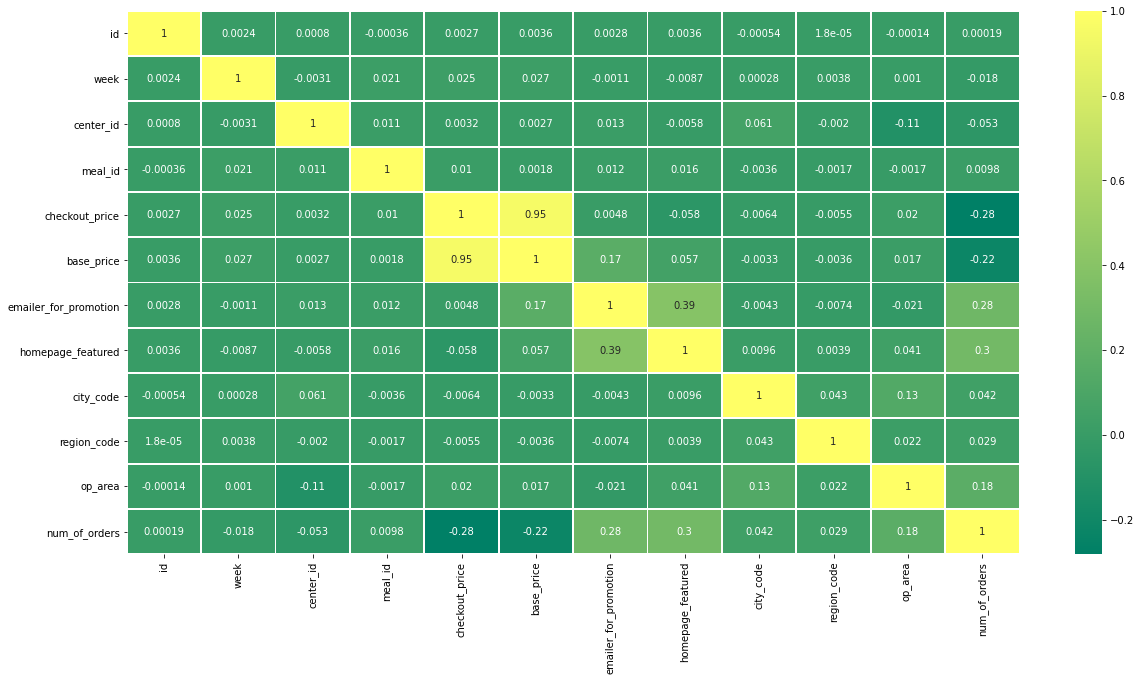

In [38]:
#plotting the correlation matrix.
plt.figure(figsize=(20,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap='summer',linewidths=1)

**Insights:** Checkout_price and Base_price are having highly positive correlation, there is a negative correlation between num_orders and checkout_price which was expected

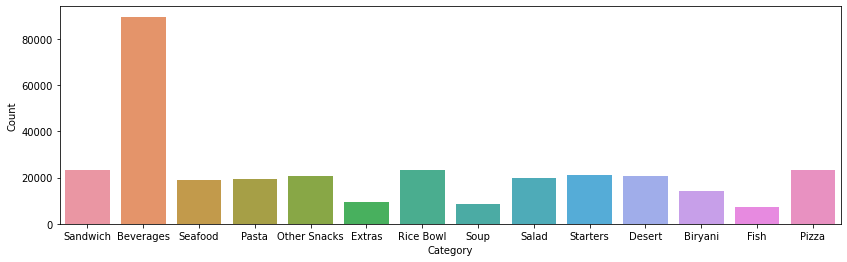

In [39]:
plt.figure(figsize=(14,4))
sns.countplot(x=X_train["category"],data=X_train)
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

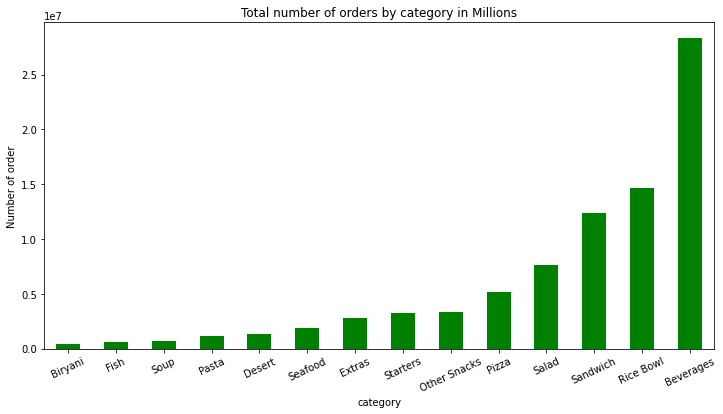

In [40]:
X_train.groupby(["category"])["num_of_orders"].sum().sort_values(ascending=True).plot.bar(figsize=(12,6),color="green")
plt.ylabel("Number of order")
plt.title("Total number of orders by category in Millions")
plt.xticks(rotation=25);

**Insight:** Beverages has highest number of orders whereas Biryani has the least

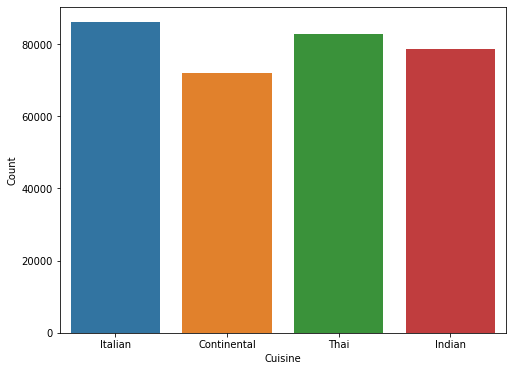

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(x=X_train["cuisine"],data=X_train)
plt.ylabel('Count')
plt.xlabel('Cuisine')
plt.show()

Text(0.5, 0, 'Cuisine')

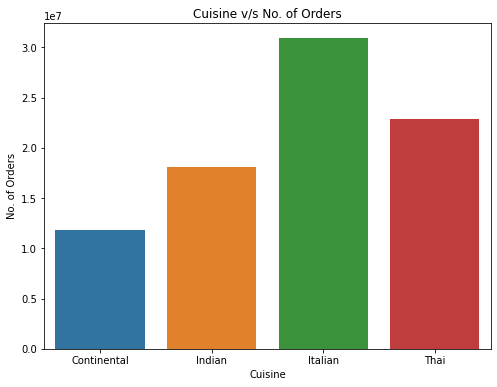

In [42]:
fig=plt.figure(figsize=(8,6))
plt.title('Cuisine v/s No. of Orders')
sns.barplot(y='num_of_orders', x='cuisine', data=X_train.groupby('cuisine').sum()['num_of_orders'].reset_index());
plt.ylabel('No. of Orders')
plt.xlabel('Cuisine')

**Insight:** Italian cusine is the most loved one whereas continental is the least loved.

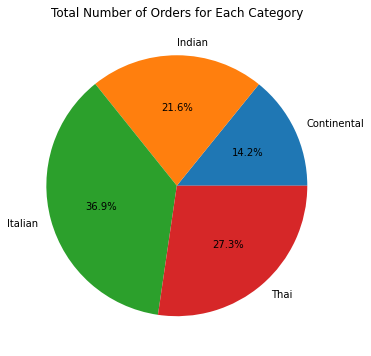

In [43]:
plt.figure(figsize=(8,6))
plt.pie(X_train.groupby(['cuisine']).num_of_orders.sum(),
    labels=X_train.groupby(['cuisine']).num_of_orders.sum().index,
    shadow=False,autopct='%1.1f%%',pctdistance=0.6,
    )
plt.title('Total Number of Orders for Each Category')

plt.show()


**Insight:**Percentage of Italian cusine is almost 2.5 times than the Continental cuisine.

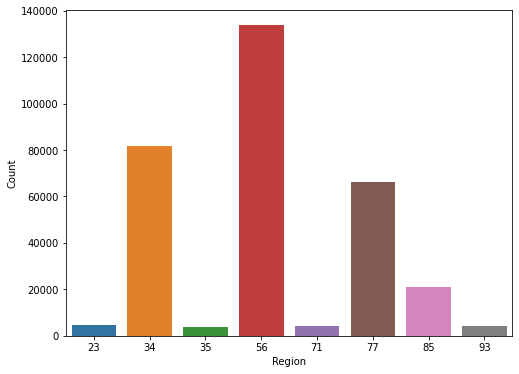

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x=X_train["region_code"],data=X_train)
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

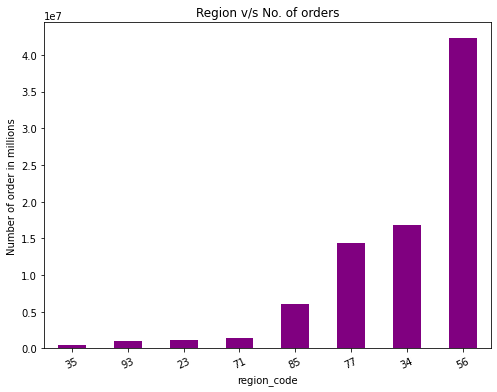

In [45]:
X_train.groupby(["region_code"])["num_of_orders"].sum().sort_values(ascending=True).plot.bar(figsize=(8,6),color="purple")
plt.ylabel("Number of order in millions")
plt.title("Region v/s No. of orders")
plt.xticks(rotation=25);

**Insight:**Region 56 has highest number of orders whereas Region 35 has least number of orders

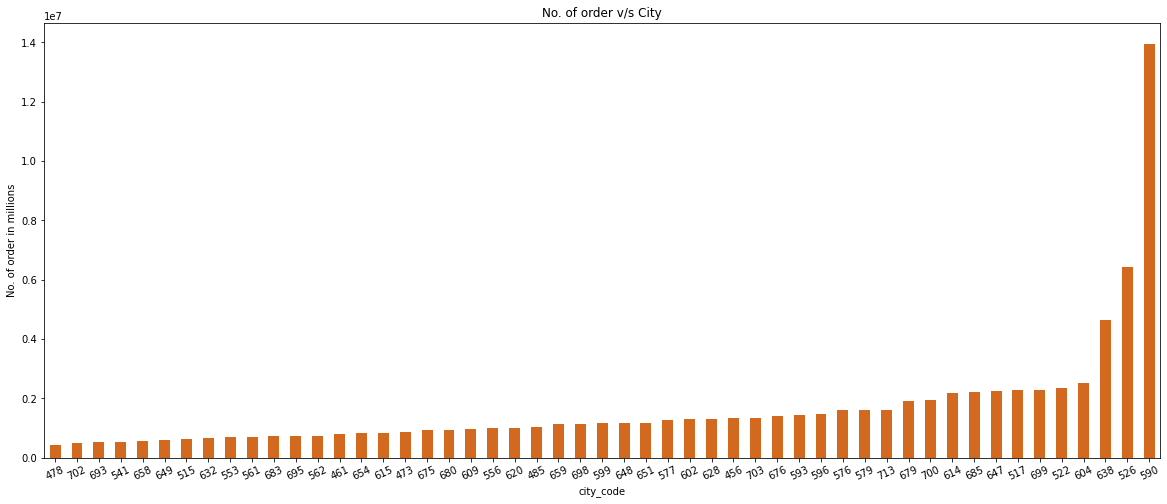

In [46]:
X_train.groupby(["city_code"])["num_of_orders"].sum().sort_values(ascending=True).plot.bar(figsize=(20,8),color="chocolate")
plt.ylabel("No. of order in millions")
plt.title("No. of order v/s City")
plt.xticks(rotation=25);

**Insight:** City 590 has highest number of orders whereas city 478 has least number of orders

In [47]:
X_train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
num_of_orders              int64
dtype: object

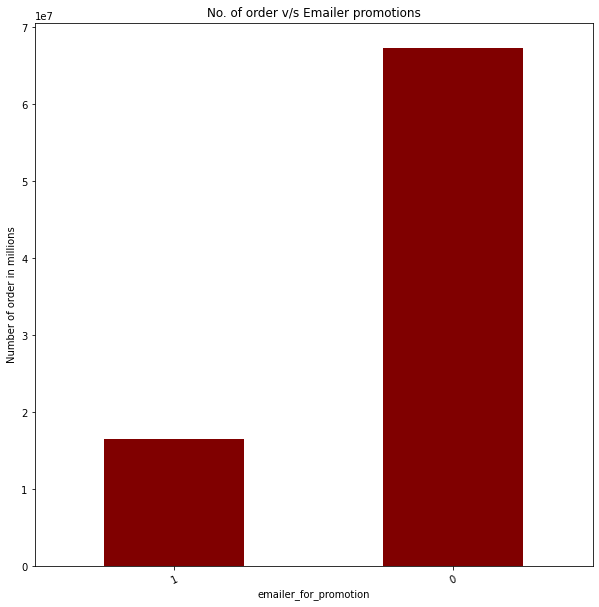

In [48]:
X_train.groupby(["emailer_for_promotion"])["num_of_orders"].sum().sort_values(ascending=True).plot.bar(figsize=(10,10),color="maroon")
plt.ylabel("Number of order in millions")
plt.title("No. of order v/s Emailer promotions")
plt.xticks(rotation=25);

**Insight:** 0 having higher value than 1 indicates that there was no email promotion for most number of times.

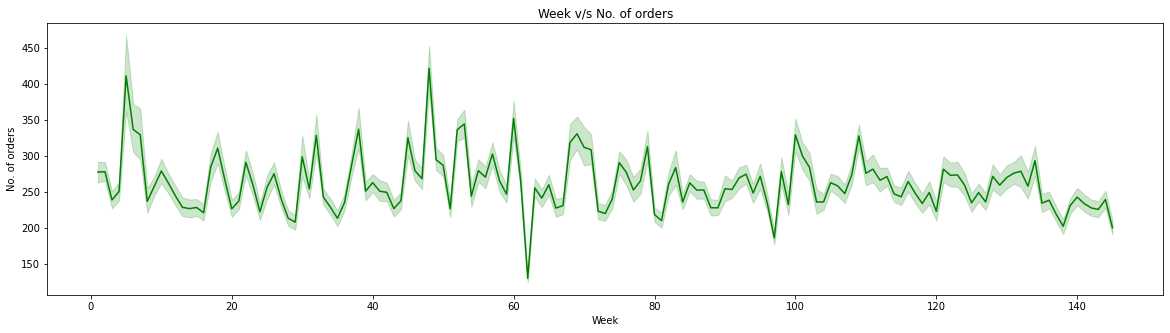

In [49]:
plt.figure(figsize=(20,5))
sns.lineplot(X_train['week'],X_train['num_of_orders'],color="green")
plt.xlabel("Week")
plt.ylabel("No. of orders")
plt.title("Week v/s No. of orders")
plt.show()

**Insight:** Week 5 and 48 are having highest number of orders as there is a peak at them whereas week 62 is having least number of orders and having a downward peak


In [50]:
X_train[['week', 'num_of_orders']].groupby('week').mean().sort_values('num_of_orders', ascending=False)

,num_of_orders
week,
48,421.981219
5,411.477672
60,352.393048
53,344.750888
38,337.491780
...,...
29,208.361611
138,202.732112
145,200.555120


**Insight:** Week 48 and 5 are at the top indicating highest number of orders whereas Week 62 is at bottom indicating least number of orders

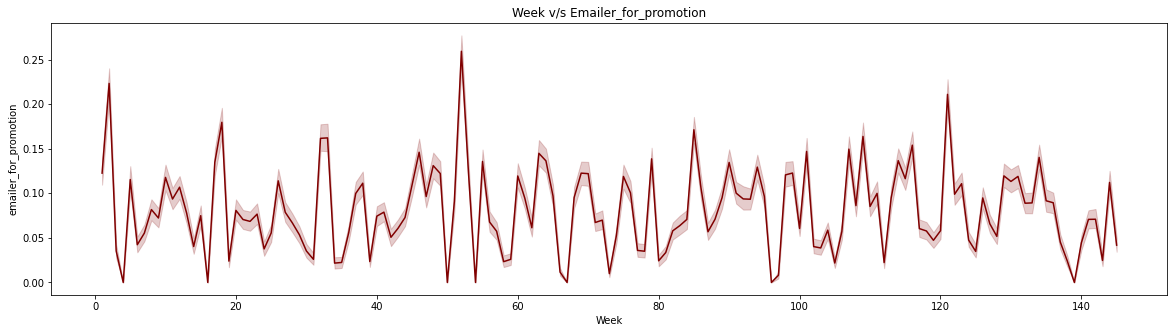

In [51]:
plt.figure(figsize=(20,5))
sns.lineplot(X_train['week'],X_train['emailer_for_promotion'],color="maroon")
plt.xlabel("Week")
plt.ylabel("emailer_for_promotion")
plt.title("Week v/s Emailer_for_promotion")
plt.show()

**Insights:** This indicates in which week email promotion was highest and in which week email promotion was least

Text(0.5, 0, 'Cuisine-Category')

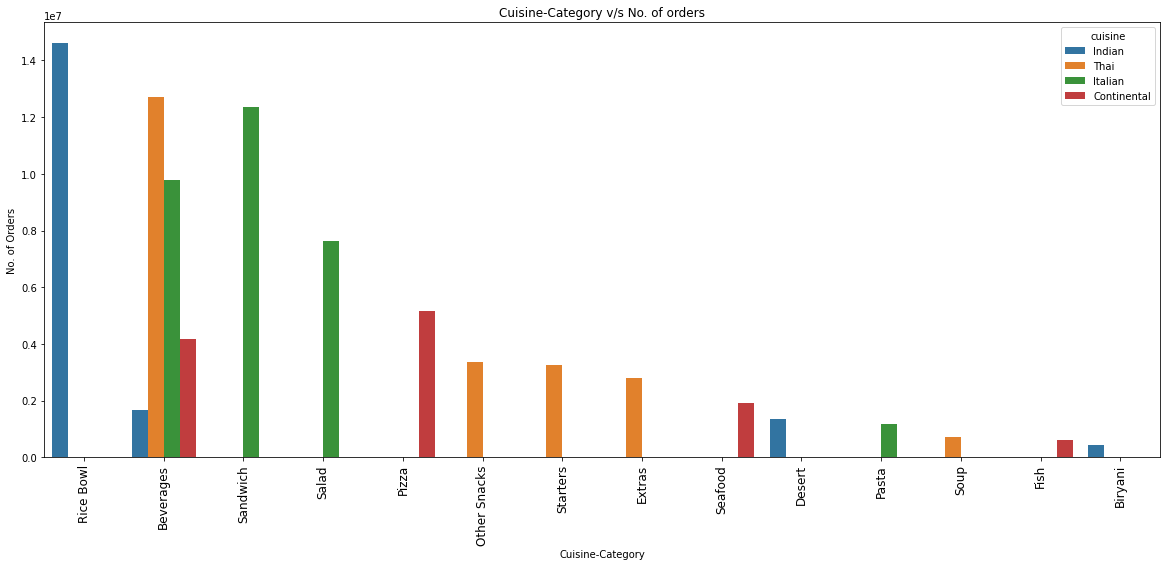

In [52]:
ig=plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.title('Cuisine-Category v/s No. of orders')
sns.barplot(x='category',y='num_of_orders',data=X_train.groupby(['cuisine','category']).sum().sort_values(by='num_of_orders', ascending=False).reset_index(),hue='cuisine')
plt.ylabel('No. of Orders')
plt.xlabel('Cuisine-Category')

**Insights:** Indian Rice Bowl is the most popular thus having highest number of orders.

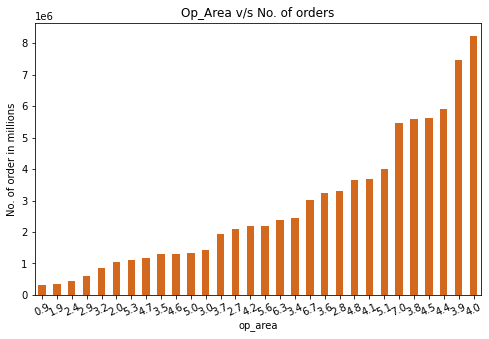

In [53]:
X_train.groupby(["op_area"])["num_of_orders"].sum().sort_values(ascending=True).plot.bar(figsize=(8,5),color="chocolate")
plt.ylabel("No. of order in millions")
plt.title("Op_Area v/s No. of orders")
plt.xticks(rotation=25);

**Insights:** Operational area 4.0 has highest number of orders whereas Operational area 0.9 has least number of orders

In [54]:
X_train['Month']=((X_train['week']-1)/4).astype('int')%13 + 1

In [55]:
X_train.Month.value_counts()

9     26881
10    26812
8     26703
7     26654
5     26539
6     26373
1     26212
4     26096
3     25938
2     25693
11    20203
12    17747
13    17732
Name: Month, dtype: int64

In [56]:
X_train['Year']=((X_train['week']-1)/52).astype(int)+1

In [57]:
X_train.Year.value_counts()

2    116917
1    108626
3     94040
Name: Year, dtype: int64

In [58]:
X_train['Quarter']=(((X_train['week']-1)/13).astype(int)%4)+1

In [59]:
X_train.Quarter.value_counts()

3    87067
2    85626
1    84491
4    62399
Name: Quarter, dtype: int64

In [60]:
X_train['Week_in_month']=((X_train['week']-1)%4)+1

In [61]:
X_train.Week_in_month.value_counts()

1    81703
4    79413
2    79356
3    79111
Name: Week_in_month, dtype: int64

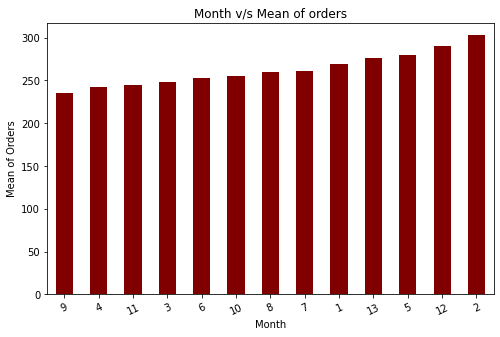

In [62]:
X_train.groupby(["Month"])["num_of_orders"].mean().sort_values(ascending=True).plot.bar(figsize=(8,5),color="maroon")
plt.ylabel("Mean of Orders")
plt.title("Month v/s Mean of orders")
plt.xticks(rotation=25);

**Insights:** Month 2 having highest number of orders whereas Month 9 having least number of orders

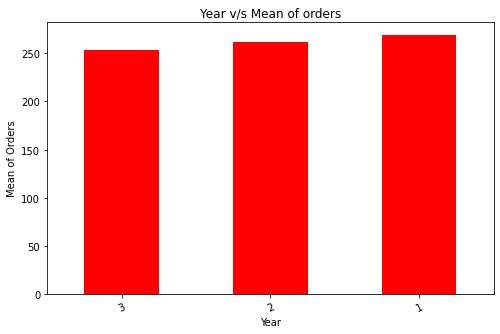

In [63]:
X_train.groupby(["Year"])["num_of_orders"].mean().sort_values(ascending=True).plot.bar(figsize=(8,5),color="red")
plt.ylabel("Mean of Orders")
plt.title("Year v/s Mean of orders")
plt.xticks(rotation=25);

**Insights:** Year 1 having highest number of orders whereas Year 3 having least number of orders

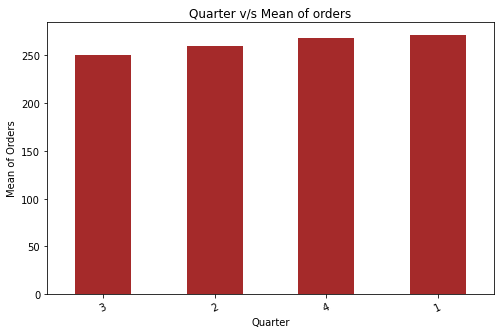

In [64]:
X_train.groupby(["Quarter"])["num_of_orders"].mean().sort_values(ascending=True).plot.bar(figsize=(8,5),color="Brown")
plt.ylabel("Mean of Orders")
plt.title("Quarter v/s Mean of orders")
plt.xticks(rotation=25);

**Insights:** Quarter 1 having highest number of orders whereas Quarter 3 having least number of orders

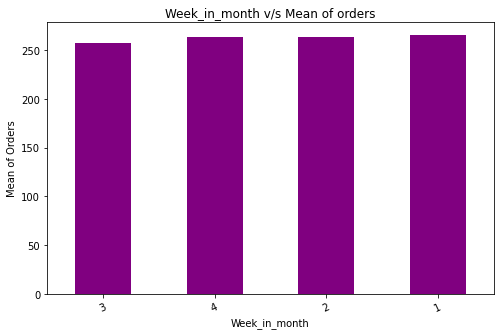

In [65]:
X_train.groupby(["Week_in_month"])["num_of_orders"].mean().sort_values(ascending=True).plot.bar(figsize=(8,5),color="purple")
plt.ylabel("Mean of Orders")
plt.title("Week_in_month v/s Mean of orders")
plt.xticks(rotation=25);

**Insights:** 1st week of month is having highest number of orders whereas 3rd week of month is having least number of orders.

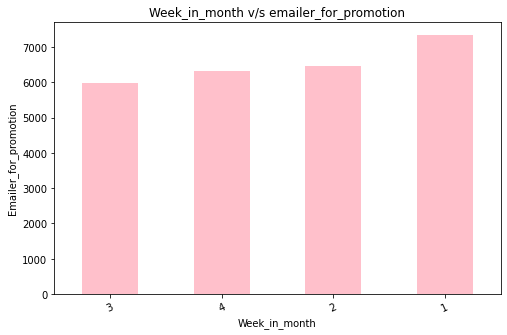

In [66]:
X_train.groupby(["Week_in_month"])["emailer_for_promotion"].sum().sort_values(ascending=True).plot.bar(figsize=(8,5),color="pink")
plt.ylabel("Emailer_for_promotion")
plt.title("Week_in_month v/s emailer_for_promotion")
plt.xticks(rotation=25);

**Insights:** 1st week of month is having highest email promotion whereas 3rd week of month is having least email promotion which is same as previous graph so we could say email promotion might be having some slight effect on number of orders

In [67]:
#sns.lineplot(x="week", y="num_of_orders", data=X_train, hue="category",sizes=(10,10))

#EDA

In [68]:
X_train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
num_of_orders              int64
Month                      int64
Year                       int64
Quarter                    int64
Week_in_month              int64
dtype: object

Here we are creating a list for all the numerical column to seperate them with categorical columns.

In [69]:
num_col=list(X_train.columns[X_train.dtypes=="float64"]) 

In [70]:
num_col #Columns with float64 datatype

['checkout_price', 'base_price', 'op_area']

In [71]:
int_col=list(X_train.columns[X_train.dtypes=="int64"])

In [72]:
int_col #Columns with int64 datatype

['id',
 'week',
 'center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'num_of_orders',
 'Month',
 'Year',
 'Quarter',
 'Week_in_month']

In [73]:
num_col.extend(int_col)

In [74]:
num_col #all the numerical columns are present in this list

['checkout_price',
 'base_price',
 'op_area',
 'id',
 'week',
 'center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'num_of_orders',
 'Month',
 'Year',
 'Quarter',
 'Week_in_month']

In [75]:
categorical_col=list(X_train.columns[X_train.dtypes=="object"])

In [76]:
categorical_col #all the categorical columns are present in this list.

['category', 'cuisine', 'center_type']

In [77]:
#Different categories in each column
for i in categorical_col:
  print(i)
  print(X_train[i].unique(),"\n")

category
['Sandwich' 'Beverages' 'Seafood' 'Pasta' 'Other Snacks' 'Extras'
 'Rice Bowl' 'Soup' 'Salad' 'Starters' 'Desert' 'Biryani' 'Fish' 'Pizza'] 

cuisine
['Italian' 'Continental' 'Thai' 'Indian'] 

center_type
['TYPE_A' 'TYPE_C' 'TYPE_B'] 



In [78]:
X_train[num_col].describe().T #This gives statistical summary of data

,count,mean,std,min,25%,50%,75%,max
checkout_price,319583.0,3.322350e+02,152.906231,2.97,228.95,296.82,445.23,866.27
base_price,319583.0,3.541968e+02,160.795407,55.35,243.50,311.37,459.81,866.27
op_area,319583.0,4.084513e+00,1.092826,0.90,3.60,4.00,4.50,7.00
id,319583.0,1.250132e+06,144425.808855,1000001.00,1124897.50,1250280.00,1375273.50,1499999.00
week,319583.0,7.473390e+01,41.528194,1.00,39.00,75.00,111.00,145.00
center_id,319583.0,8.205052e+01,45.963416,10.00,43.00,76.00,110.00,186.00
meal_id,319583.0,2.024092e+03,547.379129,1062.00,1558.00,1993.00,2539.00,2956.00
emailer_for_promotion,319583.0,8.157505e-02,0.273717,0.00,0.00,0.00,0.00,1.00
homepage_featured,319583.0,1.097993e-01,0.312640,0.00,0.00,0.00,0.00,1.00
city_code,319583.0,6.015045e+02,66.240430,456.00,553.00,596.00,651.00,713.00


In [79]:
X_train[num_col].skew() #This gives skewness of numerical columns present in dataset

checkout_price           0.671179
base_price               0.636971
op_area                  0.664209
id                      -0.001859
week                    -0.048167
center_id                0.348288
meal_id                 -0.172449
emailer_for_promotion    3.057378
homepage_featured        2.496182
city_code               -0.209172
region_code              0.054452
num_of_orders            7.156022
Month                    0.074848
Year                     0.081588
Quarter                  0.096970
Week_in_month            0.012569
dtype: float64

Acceptable range of skewness is from -3 to +3

Skewness of num_of_orders is very high as compared to other columns therefore we will use log transformation

In [80]:
X_train['log_orders']=np.log(X_train['num_of_orders']) 

In [81]:
X_train['log_orders'].skew()

-0.04730374957239431

In [82]:
#Checking correlation between numerical columns
correlation=X_train[num_col].corr()

In [83]:
correlation

,checkout_price,base_price,op_area,id,week,center_id,meal_id,emailer_for_promotion,homepage_featured,city_code,region_code,num_of_orders,Month,Year,Quarter,Week_in_month
checkout_price,1.000000,0.953151,0.020359,0.002659,0.024920,0.003179,0.010105,0.004758,-0.057608,-0.006354,-0.005544,-0.281712,-0.004082,0.026392,-0.002929,0.002106
base_price,0.953151,1.000000,0.017099,0.003593,0.027253,0.002663,0.001753,0.171892,0.057443,-0.003345,-0.003622,-0.221404,-0.003443,0.028630,-0.003614,-0.002180
op_area,0.020359,0.017099,1.000000,-0.000138,0.000997,-0.110439,-0.001701,-0.021366,0.040777,0.130992,0.022274,0.176247,0.001834,0.000428,0.001527,-0.002313
id,0.002659,0.003593,-0.000138,1.000000,0.002369,0.000803,-0.000365,0.002760,0.003619,-0.000539,0.000018,0.000187,0.001614,0.001894,0.001130,-0.002736
week,0.024920,0.027253,0.000997,0.002369,1.000000,-0.003121,0.021212,-0.001134,-0.008703,0.000282,0.003830,-0.017788,0.185739,0.939778,0.177347,0.010249
center_id,0.003179,0.002663,-0.110439,0.000803,-0.003121,1.000000,0.011200,0.013322,-0.005766,0.061242,-0.001982,-0.053378,-0.003053,-0.002099,-0.003453,0.000862
meal_id,0.010105,0.001753,-0.001701,-0.000365,0.021212,0.011200,1.000000,0.012382,0.015750,-0.003588,-0.001747,0.009807,0.010996,0.017437,0.011228,0.002020
emailer_for_promotion,0.004758,0.171892,-0.021366,0.002760,-0.001134,0.013322,0.012382,1.000000,0.391636,-0.004264,-0.007407,0.278037,-0.000695,-0.000491,-0.004625,-0.015010
homepage_featured,-0.057608,0.057443,0.040777,0.003619,-0.008703,-0.005766,0.015750,0.391636,1.000000,0.009643,0.003884,0.295560,-0.036133,0.004060,-0.038597,-0.009729
city_code,-0.006354,-0.003345,0.130992,-0.000539,0.000282,0.061242,-0.003588,-0.004264,0.009643,1.000000,0.042789,0.041579,0.000239,0.000244,0.000420,-0.001589


#Outlier detection

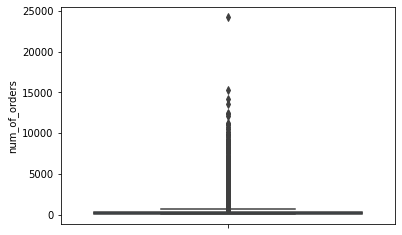

In [84]:
#Checking for outlier in num_of_orders column.
sns.boxplot(y=X_train['num_of_orders'])

There is an outlier at around 25000

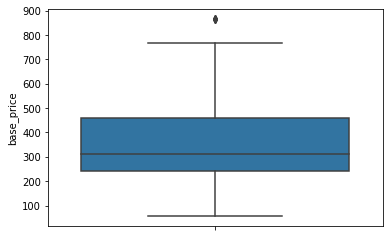

In [85]:
#Checking for outlier in base_price column.
sns.boxplot(y=X_train['base_price'])

In [86]:
#Getting index of outlier
X_train[X_train['base_price']>780]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders
53136,1156247,144,93,1445,583.03,865.27,1,1,Seafood,Continental,461,34,TYPE_A,3.9,55,10,3,4,4,4.007333
53132,1151530,140,93,1445,728.53,864.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,26,9,3,3,4,3.258097
53130,1213267,135,93,1445,866.27,866.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,94,8,3,3,3,4.543295
53131,1245765,137,93,1445,765.33,865.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,53,9,3,3,1,3.970292
53134,1350293,142,93,1445,727.53,866.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,53,10,3,3,2,3.970292
53133,1454592,141,93,1445,727.53,865.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,26,10,3,3,1,3.258097


In [87]:
#Dropping the outliers
#X_train.drop(X_train.index[53130],inplace=True)
#X_train.drop(X_train.index[53131],inplace=True)
#X_train.drop(X_train.index[53132],inplace=True)
#X_train.drop(X_train.index[53133],inplace=True)
#X_train.drop(X_train.index[53134],inplace=True)
#X_train.drop(X_train.index[53135],inplace=True)
#X_train.drop(X_train.index[53136],inplace=True)
#X_train.drop(X_train.index[53137],inplace=True)

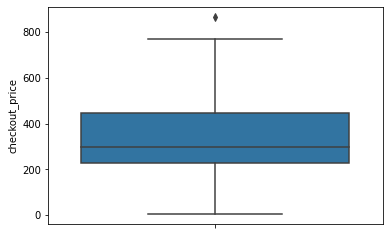

In [88]:
#Checking for outlier in checkout_price column.
sns.boxplot(y=X_train['checkout_price'])

In [89]:
#No outlier detected
X_train[X_train['checkout_price']>780]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders
53130,1213267,135,93,1445,866.27,866.27,0,0,Seafood,Continental,461,34,TYPE_A,3.9,94,8,3,3,3,4.543295


In [90]:
X_train_temporary=X_train.copy()

In [91]:
y_val.to_frame().sort_values(by='num_orders')

,num_orders
187939,13
349550,13
106425,13
243035,13
359585,13
...,...
445527,8774
108173,10259
44264,10435
270492,11246


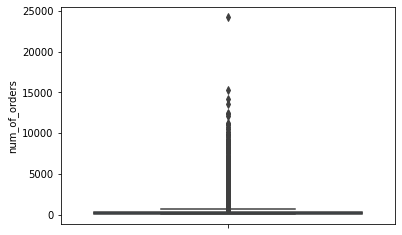

In [92]:
sns.boxplot(y=X_train_temporary['num_of_orders'])

In [93]:
y_test.describe()

count    68483.000000
mean       261.332068
std        387.433075
min         13.000000
25%         54.000000
50%        136.000000
75%        324.000000
max      12177.000000
Name: num_orders, dtype: float64

In [94]:
X_train['num_of_orders'].describe()

count    319583.000000
mean        261.924780
std         396.740822
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_of_orders, dtype: float64

In [95]:
y_train.shape

(319583,)

In [96]:
rem=y_train[y_train>5000].index
rem

Int64Index([ 90960, 391828, 149975, 392623, 392685, 392476, 392675,  44304,
            392676, 308182,
            ...
            148702, 270715, 396391, 392475, 391453, 386168, 391542, 452408,
             12331, 149080],
           dtype='int64', length=182)

In [97]:
y_train_temporary=y_train.copy()

In [98]:
y_train_temporary.shape

(319583,)

In [99]:
# Profit Amount
X_train['Profit'] = (X_train['checkout_price'] - X_train['base_price']).astype('float64')

# Profit (Y/N)
X_train['Profit_Y/N'] = [1 if x>0 else 0 for x in ((X_train['checkout_price'] - X_train['base_price'])).astype('int64')]

In [100]:
# Profit Amount
X_train_temporary['Profit'] = (X_train_temporary['checkout_price'] - X_train_temporary['base_price']).astype('float64')

# Profit (Y/N)
X_train_temporary['Profit_Y/N'] = [1 if x>0 else 0 for x in ((X_train_temporary['checkout_price'] - X_train_temporary['base_price'])).astype('int64')]

In [101]:
# Profit amount
data_test['Profit'] = (data_test['checkout_price'] - data_test['base_price']).astype('float64')

#Profit (Y/N)
data_test['Profit_Y/N'] = [1 if x>0 else 0 for x in ((data_test['checkout_price'] - data_test['base_price'])).astype('int64')]

In [102]:
X_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0


#Features

In [103]:
X_train_temporary['center_type'].value_counts()

TYPE_A    183734
TYPE_C     69863
TYPE_B     65986
Name: center_type, dtype: int64

In [104]:
label_encoder=preprocessing.LabelEncoder()

In [105]:
#Label encoding the center type column.
X_train_temporary['mean_center_type']= label_encoder.fit_transform(X_train_temporary['center_type'])
X_val['mean_center_type']= label_encoder.fit_transform(X_val['center_type'])
X_test['mean_center_type']= label_encoder.fit_transform(X_test['center_type'])
data_test['mean_center_type']= label_encoder.fit_transform(data_test['center_type'])
X_train_temporary.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1


In [106]:
label_encoder = preprocessing.LabelEncoder()

In [107]:
#Label encoding the cuisine type column.
X_train_temporary['mean_cuisine']= label_encoder.fit_transform(X_train_temporary['cuisine'])
X_val['mean_cuisine']= label_encoder.fit_transform(X_val['cuisine'])
X_test['mean_cuisine']= label_encoder.fit_transform(X_test['cuisine'])
data_test['mean_cuisine']= label_encoder.fit_transform(data_test['cuisine'])
X_train_temporary.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0


In [108]:
category_dict=X_train_temporary.groupby('category')['log_orders'].mean().to_dict() #we use mean after doing the groupby

In [109]:
category_dict

{'Beverages': 5.173035912704768,
 'Biryani': 3.2251284507032505,
 'Desert': 3.8742827456225473,
 'Extras': 5.36211933966077,
 'Fish': 4.080644109861094,
 'Other Snacks': 4.640624396891794,
 'Pasta': 3.7655645718214155,
 'Pizza': 5.014392108654162,
 'Rice Bowl': 6.084915178052351,
 'Salad': 5.687321905835352,
 'Sandwich': 5.884348944004662,
 'Seafood': 4.076053021541706,
 'Soup': 4.089144541052134,
 'Starters': 4.656392024833852}

In [110]:
#Target encoding the category column.
X_train_temporary['mean_category'] = X_train_temporary['category'].map(category_dict) #mapping
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036


In [111]:
X_val['mean_category'] = X_val['category'].map(category_dict)
X_test['mean_category'] = X_test['category'].map(category_dict)
data_test['mean_category'] = data_test['category'].map(category_dict)

In [112]:
center_id_dict=X_train_temporary.groupby('center_id')['log_orders'].mean().to_dict()

In [113]:
center_id_dict

{10: 5.6409607323699955,
 11: 5.3031762466774826,
 13: 5.8241561700145,
 14: 4.62531157230463,
 17: 4.703864192186308,
 20: 4.698081388329366,
 23: 4.786308886629466,
 24: 5.433373486019881,
 26: 4.544587211331915,
 27: 5.091560800050039,
 29: 4.642105365050694,
 30: 4.917286109262355,
 32: 4.8209535565490365,
 34: 4.762626296674797,
 36: 5.049560388665484,
 39: 4.697077627114161,
 41: 4.272910092665349,
 42: 4.624288821925802,
 43: 5.604501487889842,
 50: 4.935173460688354,
 51: 5.073889831972707,
 52: 5.4831556262561705,
 53: 4.541084151812101,
 55: 4.466538595478774,
 57: 4.527963366778366,
 58: 4.596369700329808,
 59: 4.961001555848766,
 61: 4.754864875857817,
 64: 4.649668008686607,
 65: 5.140399388310295,
 66: 5.0725001669046925,
 67: 5.361635374127111,
 68: 4.764096038543102,
 72: 4.7207317773512365,
 73: 4.737628589352808,
 74: 4.378233580076885,
 75: 5.218502461244438,
 76: 4.730982656948218,
 77: 4.476859051417974,
 80: 4.758022101293168,
 81: 4.75617283451153,
 83: 4.9875454

In [114]:
#Target encoding the center_id column.
X_train_temporary['mean_center_id'] = X_train_temporary['center_id'].map(center_id_dict) #mapping
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349,5.393508
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036,4.718911
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053,5.091561
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565,4.758257
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036,4.781450


In [115]:
X_val['mean_center_id'] = X_val['center_id'].map(center_id_dict)
X_test['mean_center_id'] = X_test['center_id'].map(center_id_dict)
data_test['mean_center_id'] = data_test['center_id'].map(center_id_dict)

In [116]:
meal_id_dict = X_train_temporary.groupby('meal_id')['log_orders'].mean().to_dict()

In [117]:
meal_id_dict

{1062: 5.879913605646331,
 1109: 6.052428281960267,
 1198: 5.160551549915025,
 1207: 4.808911512981461,
 1216: 3.74805379409213,
 1230: 4.826032081687203,
 1247: 3.2775979150765067,
 1248: 4.116173972366305,
 1311: 5.428780304354396,
 1438: 4.195294208138218,
 1445: 4.158103498714789,
 1525: 4.704917540377662,
 1543: 4.045087860043246,
 1558: 4.68798825053688,
 1571: 4.14255678503381,
 1727: 5.7294687781378535,
 1754: 6.080459826091433,
 1770: 3.16935195858769,
 1778: 5.411173689572316,
 1803: 5.476862631128449,
 1847: 3.899417519049004,
 1878: 4.598671611048347,
 1885: 6.275213946668551,
 1902: 3.223653381306315,
 1962: 5.326047996804084,
 1971: 5.72004444391731,
 1993: 6.111970899385763,
 2104: 3.8792804925440887,
 2126: 3.831339070244434,
 2139: 3.5187051083422194,
 2290: 6.477697614305224,
 2304: 3.824113540194183,
 2306: 3.7100927448074787,
 2322: 5.02475617758187,
 2444: 4.059194410626581,
 2490: 5.592137306669962,
 2492: 3.737771322493648,
 2494: 4.162955973530489,
 2539: 5.3491

In [118]:
#Target encoding the meal_id column.
X_train_temporary['mean_meal_id'] = X_train_temporary['meal_id'].map(meal_id_dict) #mapping
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349,5.393508,6.080460
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036,4.718911,4.808912
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053,5.091561,4.158103
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565,4.758257,3.710093
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036,4.781450,4.826032


In [119]:
X_val['mean_meal_id'] = X_val['meal_id'].map(meal_id_dict)
X_test['mean_meal_id'] = X_test['meal_id'].map(meal_id_dict)
data_test['mean_meal_id'] = data_test['meal_id'].map(meal_id_dict)

In [120]:
city_code_dict = X_train_temporary.groupby('city_code')['log_orders'].mean().to_dict()

In [121]:
city_code_dict

{456: 4.961001555848766,
 461: 4.74956537133412,
 473: 4.754864875857817,
 478: 4.355585798413998,
 485: 4.910556224188538,
 515: 4.544587211331915,
 517: 4.883116854318073,
 522: 4.858580543216754,
 526: 4.731548681445223,
 541: 4.527963366778366,
 553: 4.649668008686607,
 556: 4.935173460688354,
 561: 4.624288821925802,
 562: 4.672161308261405,
 576: 4.7602962556937625,
 577: 4.9309477570299896,
 579: 5.1815889598468985,
 590: 5.107307504411313,
 593: 4.624277061547768,
 596: 4.968607988067061,
 599: 4.923102538737621,
 602: 5.140399388310295,
 604: 4.839572216763378,
 609: 4.758256833572721,
 614: 5.053512691641089,
 615: 4.762626296674797,
 620: 4.9612425559900135,
 628: 5.142457184248659,
 632: 4.586522560968733,
 638: 5.063801487149257,
 647: 4.812965034476635,
 648: 5.0725001669046925,
 649: 4.487907955333677,
 651: 5.218502461244438,
 654: 4.62531157230463,
 658: 4.467035615669825,
 659: 4.987545431400423,
 675: 4.865323566250178,
 676: 4.62911860636356,
 679: 5.303176246677482

In [122]:
#Target encoding the city_code column.
X_train_temporary['mean_city_code'] = X_train_temporary['city_code'].map(city_code_dict) #mapping
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id,mean_city_code
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349,5.393508,6.080460,5.107308
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036,4.718911,4.808912,5.107308
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053,5.091561,4.158103,5.091561
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565,4.758257,3.710093,4.758257
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036,4.781450,4.826032,4.760296


In [123]:
X_val['mean_city_code'] = X_val['city_code'].map(city_code_dict)
X_test['mean_city_code'] = X_test['city_code'].map(city_code_dict)
data_test['mean_city_code'] = data_test['city_code'].map(city_code_dict)

In [124]:
region_code_dict = X_train_temporary.groupby('region_code')['log_orders'].mean().to_dict()

In [125]:
X_train_temporary['mean_region_code'] = X_train_temporary['region_code'].map(region_code_dict) #mapping
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id,mean_city_code,mean_region_code
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349,5.393508,6.080460,5.107308,5.013989
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036,4.718911,4.808912,5.107308,5.013989
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053,5.091561,4.158103,5.091561,4.958439
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565,4.758257,3.710093,4.758257,4.758257
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036,4.781450,4.826032,4.760296,4.731143


In [126]:
#Target encoding the region column.
X_val['mean_region_code'] = X_val['region_code'].map(region_code_dict)
X_test['mean_region_code'] = X_test['region_code'].map(region_code_dict)
data_test['mean_region_code'] = data_test['region_code'].map(region_code_dict)

In [127]:
X_train_temporary['profit_percent'] = ((X_train_temporary['checkout_price']-X_train_temporary['base_price'])/X_train_temporary['base_price'])*100

In [128]:
X_val['profit_percent'] = ((X_val['checkout_price']-X_val['base_price'])/X_val['base_price'])*100

In [129]:
X_test['profit_percent'] = ((X_test['checkout_price']-X_test['base_price'])/X_test['base_price'])*100

In [130]:
data_test['profit_percent'] = ((data_test['checkout_price']-data_test['base_price'])/data_test['base_price'])*100

In [131]:
X_train_temporary.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id,mean_city_code,mean_region_code,profit_percent
149784,1345680,87,137,1754,310.43,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,269,9,2,3,3,5.594711,0.00,0,0,2,5.884349,5.393508,6.080460,5.107308,5.013989,0.000000
84511,1194206,40,124,1207,460.81,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,121,10,1,4,4,4.795791,0.00,0,2,0,5.173036,4.718911,4.808912,5.107308,5.013989,0.000000
191227,1253932,2,27,1445,628.62,627.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,150,1,1,1,2,5.010635,1.00,1,0,0,4.076053,5.091561,4.158103,5.091561,4.958439,0.159332
196636,1224045,144,157,2306,291.03,356.05,0,0,Pasta,Italian,609,93,TYPE_A,4.1,13,10,3,4,4,2.564949,-65.02,0,0,2,3.765565,4.758257,3.710093,4.758257,4.758257,-18.261480
90733,1241922,61,152,1230,321.10,322.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,122,3,2,1,1,4.804021,-1.00,0,1,0,5.173036,4.781450,4.826032,4.760296,4.731143,-0.310463


In [132]:
def corr_handle(X_train,threshold=0.5):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = X_train.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [133]:
corr_handle(X_train_temporary,0.76)

['mean_meal_id', 'Quarter', 'profit_percent', 'base_price', 'Year']

In [134]:
corrr=X_train_temporary.corr()
corrr

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,num_of_orders,Month,Year,Quarter,Week_in_month,log_orders,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id,mean_city_code,mean_region_code,profit_percent
id,1.000000,0.002369,0.000803,-0.000365,0.002659,0.003593,0.002760,0.003619,-0.000539,0.000018,-0.000138,0.000187,0.001614,0.001894,0.001130,-0.002736,-0.002390,-0.003519,0.001080,-0.000272,-0.002274,-0.003392,0.001095,-0.003717,0.000561,0.001558,-0.002897
week,0.002369,1.000000,-0.003121,0.021212,0.024920,0.027253,-0.001134,-0.008703,0.000282,0.003830,0.000997,-0.017788,0.185739,0.939778,0.177347,0.010249,-0.008390,-0.011754,0.012151,-0.000006,-0.017227,-0.000794,0.006681,-0.005320,0.005871,0.003020,0.016055
center_id,0.000803,-0.003121,1.000000,0.011200,0.003179,0.002663,0.013322,-0.005766,0.061242,-0.001982,-0.110439,-0.053378,-0.003053,-0.002099,-0.003453,0.000862,-0.055724,0.001192,0.005474,-0.107474,-0.022800,0.008691,-0.209918,0.009177,-0.199245,-0.168289,0.004909
meal_id,-0.000365,0.021212,0.011200,1.000000,0.010105,0.001753,0.012382,0.015750,-0.003588,-0.001747,-0.001701,0.009807,0.010996,0.017437,0.011228,0.002020,0.028411,0.025968,0.018302,-0.007249,0.166223,0.023289,-0.010623,0.038917,-0.019879,-0.032981,0.046478
checkout_price,0.002659,0.024920,0.003179,0.010105,1.000000,0.953151,0.004758,-0.057608,-0.006354,-0.005544,0.020359,-0.281712,-0.004082,0.026392,-0.002929,0.002106,-0.389418,-0.007320,0.056112,-0.016489,-0.685907,-0.418772,0.016345,-0.430042,0.006185,-0.016063,0.183883
base_price,0.003593,0.027253,0.002663,0.001753,0.953151,1.000000,0.171892,0.057443,-0.003345,-0.003622,0.017099,-0.221404,-0.003443,0.028630,-0.003614,-0.002180,-0.328937,-0.309464,-0.032846,-0.014208,-0.720234,-0.418403,0.013853,-0.438781,0.006778,-0.009762,-0.093047
emailer_for_promotion,0.002760,-0.001134,0.013322,0.012382,0.004758,0.171892,1.000000,0.391636,-0.004264,-0.007407,-0.021366,0.278037,-0.000695,-0.000491,-0.004625,-0.015010,0.228386,-0.553276,-0.158030,0.007688,-0.152672,0.039571,-0.030305,0.030190,-0.032737,-0.040336,-0.479052
homepage_featured,0.003619,-0.008703,-0.005766,0.015750,-0.057608,0.057443,0.391636,1.000000,0.009643,0.003884,0.040777,0.295560,-0.036133,0.004060,-0.038597,-0.009729,0.250079,-0.370987,-0.101114,-0.029140,-0.015748,0.012858,0.032953,0.042708,0.015227,0.020478,-0.339783
city_code,-0.000539,0.000282,0.061242,-0.003588,-0.006354,-0.003345,-0.004264,0.009643,1.000000,0.042789,0.130992,0.041579,0.000239,0.000244,0.000420,-0.001589,0.031275,-0.008918,-0.003729,0.093187,0.014778,-0.000695,0.117814,-0.001585,0.166664,0.083588,-0.013309
region_code,0.000018,0.003830,-0.001982,-0.001747,-0.005544,-0.003622,-0.007407,0.003884,0.042789,1.000000,0.022274,0.029019,0.000665,0.003599,0.000284,0.000663,0.029597,-0.005454,-0.004763,-0.009530,0.018014,-0.001576,0.111493,-0.001458,0.157723,0.259171,-0.009352


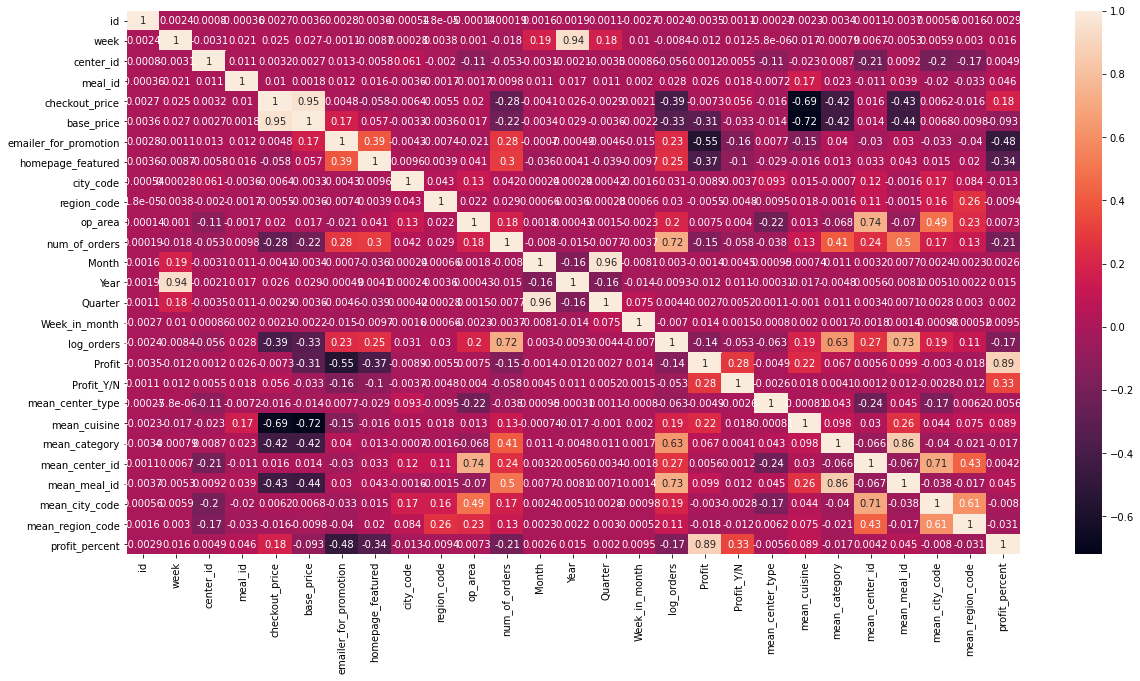

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,10))
sns.heatmap(corrr,annot=True)

In [136]:
X_train_new=X_train_temporary.drop(['log_orders',
 'mean_category',
 'Profit',
 'Quarter',
 'num_of_orders',
 'Year',
 'base_price'],axis=1)

In [137]:
X_train_new.drop(['id'],axis=1, inplace=True)

In [138]:
corr_handle(X_train_new,0.76)

[]

In [139]:
X_train_new.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,Month,Week_in_month,Profit_Y/N,mean_center_type,mean_cuisine,mean_center_id,mean_meal_id,mean_city_code,mean_region_code,profit_percent
149784,87,137,1754,310.43,0,0,Sandwich,Italian,590,56,TYPE_A,4.4,9,3,0,0,2,5.393508,6.080460,5.107308,5.013989,0.000000
84511,40,124,1207,460.81,0,0,Beverages,Continental,590,56,TYPE_C,4.0,10,4,0,2,0,4.718911,4.808912,5.107308,5.013989,0.000000
191227,2,27,1445,628.62,0,0,Seafood,Continental,713,85,TYPE_A,4.5,1,2,1,0,0,5.091561,4.158103,5.091561,4.958439,0.159332
196636,144,157,2306,291.03,0,0,Pasta,Italian,609,93,TYPE_A,4.1,10,4,0,0,2,4.758257,3.710093,4.758257,4.758257,-18.261480
90733,61,152,1230,321.10,0,0,Beverages,Continental,576,34,TYPE_B,4.0,3,1,0,1,0,4.781450,4.826032,4.760296,4.731143,-0.310463


In [140]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

Here we are creating a list of categorical columns and later we are dropping them

In [141]:
cat_list=list(X_train_new.columns[X_train_new.dtypes=='object'])
cat_list

['category', 'cuisine', 'center_type']

In [142]:
X_train_new.drop(columns=['center_type', 'category', 'cuisine'], inplace=True)

In [143]:
cat_list=list(X_val.columns[X_val.dtypes=='object'])
cat_list

['category', 'cuisine', 'center_type']

In [144]:
X_val.drop(columns=['center_type', 'category', 'cuisine'], inplace=True)

In [145]:
cat_list=list(X_test.columns[X_test.dtypes=='object'])
cat_list

['category', 'cuisine', 'center_type']

In [146]:
X_test.drop(columns=['center_type', 'category', 'cuisine'], inplace=True)

In [147]:
cat_list=list(data_test.columns[data_test.dtypes=='object'])
cat_list

['category', 'cuisine', 'center_type']

In [148]:
data_test.drop(columns=['center_type', 'category', 'cuisine'], inplace=True)

Here we have log_transformed the y_train_temporary 

In [149]:
log_y_train_temporary=np.log(y_train_temporary)

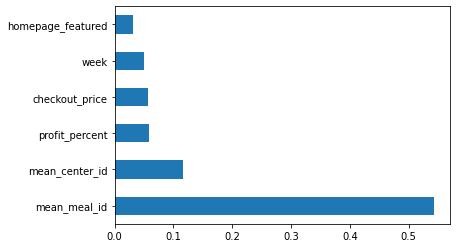

In [150]:
feature_importance=tree_based_feature_importance(X_train_new,log_y_train_temporary)

In [151]:
X_train_new.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,Month,Week_in_month,Profit_Y/N,mean_center_type,mean_cuisine,mean_center_id,mean_meal_id,mean_city_code,mean_region_code,profit_percent
149784,87,137,1754,310.43,0,0,590,56,4.4,9,3,0,0,2,5.393508,6.080460,5.107308,5.013989,0.000000
84511,40,124,1207,460.81,0,0,590,56,4.0,10,4,0,2,0,4.718911,4.808912,5.107308,5.013989,0.000000
191227,2,27,1445,628.62,0,0,713,85,4.5,1,2,1,0,0,5.091561,4.158103,5.091561,4.958439,0.159332
196636,144,157,2306,291.03,0,0,609,93,4.1,10,4,0,0,2,4.758257,3.710093,4.758257,4.758257,-18.261480
90733,61,152,1230,321.10,0,0,576,34,4.0,3,1,0,1,0,4.781450,4.826032,4.760296,4.731143,-0.310463


In [152]:
display(feature_importance)

,Features,Importances
15,mean_meal_id,0.542332
14,mean_center_id,0.116080
18,profit_percent,0.058282
3,checkout_price,0.057360
0,week,0.049302
5,homepage_featured,0.031006
9,Month,0.021001
4,emailer_for_promotion,0.016421
13,mean_cuisine,0.016028
10,Week_in_month,0.014047


In [153]:
#Selecting the important features derived from tree based feature selection
feature_selected=['mean_meal_id', 'mean_center_id','profit_percent','checkout_price', 'homepage_featured','mean_cuisine', 'emailer_for_promotion', 'mean_center_type']

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
import math

In [155]:
MSE_Score = []
RMSE_Score = []
R2_Score = []
Algorithm = []

Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_train_new[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_train_temporary, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_train_temporary, predicted)))
R2_Score.append(r2_score(y_train_temporary, predicted))

In [156]:
predicted[:50]

array([ 690.,   84.,   64.,   38.,  105.,  245.,  289.,  345.,  464.,
        235.,  266.,   29., 2520.,  302.,   57.,   76.,  539.,   49.,
        448.,   23.,   67.,  248.,  374.,  834.,  488.,  227.,   35.,
        153.,  413.,  126.,   56.,   29.,   44.,   57.,  268.,   50.,
         89.,   63.,   89.,  183.,   78.,   40.,   54.,  401.,   40.,
         56.,   43., 1715.,  232.,  218.])

In [157]:
y_train[:50]

149784     269
84511      121
191227     150
196636      13
90733      122
171931     149
433021     499
266847     458
390075     985
79664      487
335662     405
388019      40
392372    3376
404667     310
154386      68
285120      42
453245     405
345643      95
287864     310
365349      55
14622       54
456084     351
230611     837
371210    1079
143535     527
44711      404
213641      41
47234      323
340531     744
427208     135
406776      41
451250      53
446241      67
70425       15
391868     243
290421      82
8149        53
123171     135
16137       27
341305     188
14335       69
289080      15
157558      27
7630       270
286087      41
170796      82
93451       67
62053      634
52440      311
374714     459
Name: num_orders, dtype: int64

In [158]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_train = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Train','RMSE_Train','R2_Train'])
# Score Card
Comparison_train

,Algorithms,MSE_Train,RMSE_Train,R2_Train
0,Linear Regression,57704.39473,240.217391,0.633397


In [159]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_train_new[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_train_temporary, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_train_temporary, predicted)))
R2_Score.append(r2_score(y_train_temporary, predicted))

In [160]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_train = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Train','RMSE_Train','R2_Train'])
# Score Card
Comparison_train

,Algorithms,MSE_Train,RMSE_Train,R2_Train
0,Linear Regression,57704.394730,240.217391,0.633397
1,Random Forest Regressor,6982.642396,83.562207,0.955638


In [161]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_train_new[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_train_temporary, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_train_temporary, predicted)))
R2_Score.append(r2_score(y_train_temporary, predicted))

[14:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [162]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_train = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Train','RMSE_Train','R2_Train'])
# Score Card
Comparison_train

,Algorithms,MSE_Train,RMSE_Train,R2_Train
0,Linear Regression,57704.394730,240.217391,0.633397
1,Random Forest Regressor,6982.642396,83.562207,0.955638
2,XGB Regressor,49614.689026,222.743550,0.684792


In [163]:
from lightgbm import LGBMRegressor

In [164]:
Algorithm.append('LGB Regressor')
clf=LGBMRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_train_new[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_train_temporary, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_train_temporary, predicted)))
R2_Score.append(r2_score(y_train_temporary, predicted))

In [165]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison_train = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Train','RMSE_Train', 'R2_Train'])
# Score Card
Comparison_train

,Algorithms,MSE_Train,RMSE_Train,R2_Train
0,Linear Regression,57704.394730,240.217391,0.633397
1,Random Forest Regressor,6982.642396,83.562207,0.955638
2,XGB Regressor,49614.689026,222.743550,0.684792
3,LGB Regressor,42453.033400,206.041339,0.730290


In [166]:
MSE_Score = []
PMSE_Score = []
R2_Score = []
Algorithm = []

Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_val[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_val, predicted)))
R2_Score.append(r2_score(y_val, predicted))

In [167]:
Comparison_val = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score,R2_Score)), columns = ['Algorithms', 'MSE_Val','RMSE_Val' ,'R2_Val'])
# Score Card
Comparison_val

,Algorithms,MSE_Val,RMSE_Val,R2_Val
0,Linear Regression,60423.222745,240.217391,0.623253


In [168]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_val[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_val, predicted)))
R2_Score.append(r2_score(y_val, predicted))

In [169]:
Comparison_val = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Val','RMSE_Val' ,'R2_Val'])
# Score Card
Comparison_val

,Algorithms,MSE_Val,RMSE_Val,R2_Val
0,Linear Regression,60423.222745,240.217391,0.623253
1,Random Forest Regressor,30806.310987,83.562207,0.807918


In [170]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_val[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_val, predicted)))
R2_Score.append(r2_score(y_val, predicted))

[14:09:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [171]:
Comparison_val = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Val','RMSE_Val' ,'R2_Val'])
# Score Card
Comparison_val

,Algorithms,MSE_Val,RMSE_Val,R2_Val
0,Linear Regression,60423.222745,240.217391,0.623253
1,Random Forest Regressor,30806.310987,83.562207,0.807918
2,XGB Regressor,52120.455258,222.743550,0.675022


In [172]:
from lightgbm import LGBMRegressor

In [173]:
Algorithm.append('LGB Regressor')
clf=LGBMRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_val[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_val, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_val, predicted)))
R2_Score.append(r2_score(y_val, predicted))

In [174]:
Comparison_val = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_Val','RMSE_Val' ,'R2_Val'])
# Score Card
Comparison_val

,Algorithms,MSE_Val,RMSE_Val,R2_Val
0,Linear Regression,60423.222745,240.217391,0.623253
1,Random Forest Regressor,30806.310987,83.562207,0.807918
2,XGB Regressor,52120.455258,222.743550,0.675022
3,LGB Regressor,44667.999723,206.041339,0.721489


In [175]:
MSE_Score = []
PMSE_Score = []
R2_Score = []
Algorithm = []

Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_test[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [176]:
Comparison_local_test = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_local_test','RMSE_local_test' ,'R2_local_test'])
# Score Card
Comparison_local_test

,Algorithms,MSE_local_test,RMSE_local_test,R2_local_test
0,Linear Regression,54661.263496,240.217391,0.63584


In [177]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_test[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [178]:
Comparison_local_test = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_local_test','RMSE_local_test' ,'R2_local_test'])
# Score Card
Comparison_local_test

,Algorithms,MSE_local_test,RMSE_local_test,R2_local_test
0,Linear Regression,54661.263496,240.217391,0.635840
1,Random Forest Regressor,27225.439540,83.562207,0.818621


In [179]:
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_test[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

[14:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [180]:
Comparison_local_test = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_local_test','RMSE_local_test' ,'R2_local_test'])
# Score Card
Comparison_local_test

,Algorithms,MSE_local_test,RMSE_local_test,R2_local_test
0,Linear Regression,54661.263496,240.217391,0.635840
1,Random Forest Regressor,27225.439540,83.562207,0.818621
2,XGB Regressor,46901.455938,222.743550,0.687537


In [181]:
from lightgbm import LGBMRegressor

In [182]:
Algorithm.append('LGB Regressor')
clf=LGBMRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(X_test[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(math.sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [183]:
Comparison_local_test = pd.DataFrame(list(zip(Algorithm, MSE_Score,RMSE_Score, R2_Score)), columns = ['Algorithms', 'MSE_local_test','RMSE_local_test' ,'R2_local_test'])
# Score Card
Comparison_local_test

,Algorithms,MSE_local_test,RMSE_local_test,R2_local_test
0,Linear Regression,54661.263496,240.217391,0.635840
1,Random Forest Regressor,27225.439540,83.562207,0.818621
2,XGB Regressor,46901.455938,222.743550,0.687537
3,LGB Regressor,39910.974534,206.041339,0.734108


In [184]:
clf = RandomForestRegressor()
clf.fit(X_train_new[feature_selected], log_y_train_temporary)
log_predicted = clf.predict(data_test[feature_selected])
predicted=np.exp(log_predicted)
predicted=np.ceil(predicted)

Here we are creating the target column that is the predicted_num_orders

In [185]:
data_test['predicted_num_orders']=predicted

In [186]:
data_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,Profit,Profit_Y/N,mean_center_type,mean_cuisine,mean_category,mean_center_id,mean_meal_id,mean_city_code,mean_region_code,profit_percent,predicted_num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2.0,-1.0,0,2,3,5.173036,4.466539,6.275214,4.812965,5.013989,-0.628496,88.0
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,2.0,0.0,0,2,3,5.173036,4.466539,6.275214,4.812965,5.013989,0.000000,92.0
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,2.0,-1.0,0,2,3,5.173036,4.466539,6.275214,4.812965,5.013989,-0.632351,96.0
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,2.0,2.0,1,2,3,5.173036,4.466539,6.275214,4.812965,5.013989,1.272750,126.0
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,2.0,1.0,1,2,3,5.173036,4.466539,6.275214,4.812965,5.013989,0.628496,90.0


In [187]:
data_test['predicted_num_orders']

0         88.0
1         92.0
2         96.0
3        126.0
4         90.0
         ...  
32568     46.0
32569     39.0
32570     43.0
32571     43.0
32572     28.0
Name: predicted_num_orders, Length: 32573, dtype: float64